# DDPG (Deep Deterministic Policy Gradients) para _pendulum_
---
[**Juan Gómez Romero**](https://decsai.ugr.es/~jgomez)  
Departamento de Ciencias de la Computación e Inteligencia Artificial  
Universidad de Granada  
This work is licensed under the [GNU General Public License v3.0](https://choosealicense.com/licenses/gpl-3.0/).

---
Ejemplo basado en:
> Udacity (2019) Deep Reinforcement Learning Course. Disponible en [GitHub](https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-pendulu).

## Explorar entorno virtual

En este ejercicio utilizamos el entorno virtual [Pendulum-v0](https://github.com/openai/gym/wiki/Pendulum-v0) de [OpenAI](https://openai.com). 

![](pendulum.gif)

Implementación de un agente con comportamiento sin entrenar utilizando la clase [`Agent`](ddpg_agent.py).

In [1]:
import gym
from ddpg_agent import Agent

env = gym.make("Pendulum-v0")

agent = Agent(state_size=3, action_size=1, random_seed=0)

state = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

## Algoritmo
A continuación se proporciona una implementación genérica del algoritmo DDPG y su aplicación a [Pendulum-v0](https://github.com/openai/gym/wiki/Pendulum-v0).

Episodio 100	Puntuación media (últimos 100): -1143.17
Episodio 100	Average Score (100 anteriores): -1143.17
Episodio 200	Puntuación media (últimos 100): -732.57
Episodio 200	Average Score (100 anteriores): -732.57
Episodio 300	Puntuación media (últimos 100): -429.26
Episodio 300	Average Score (100 anteriores): -429.26
Episodio 400	Puntuación media (últimos 100): -475.74
Episodio 400	Average Score (100 anteriores): -475.74
Episodio 500	Puntuación media (últimos 100): -372.07
Episodio 500	Average Score (100 anteriores): -372.07
Episodio 600	Puntuación media (últimos 100): -352.22
Episodio 600	Average Score (100 anteriores): -352.22
Episodio 700	Puntuación media (últimos 100): -476.62
Episodio 700	Average Score (100 anteriores): -476.62
Episodio 800	Puntuación media (últimos 100): -628.27
Episodio 800	Average Score (100 anteriores): -628.27
Episodio 900	Puntuación media (últimos 100): -722.73
Episodio 900	Average Score (100 anteriores): -722.73
Episodio 1000	Puntuación media (últimos 100)

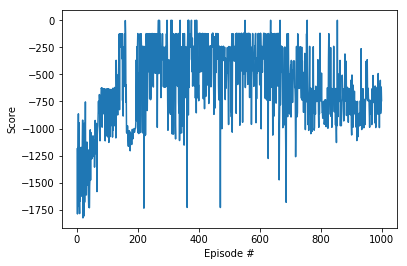

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisodio {}\tPuntuacion media (últimos {:d}): {:.2f}'.format(i_episode, print_every, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\nEpisodio {}\tPuntuacion media({:d} anteriores): {:.2f}'.format(i_episode, print_every, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Visualizar agente entrenado

Podemos visualizar el comportamiento del agente entrenado cargando los pesos del fichero donde se han almacenado. (Solo en entorno local, no en Google Collaboratory.)

In [3]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()